<a href="https://colab.research.google.com/github/Pathin220/4105_ML_Hw5/blob/main/4105_Hw_5_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#1. In our temperature prediction example, let’s change our model to a nonlinear system. Consider the following description for our model:

#w2 * t_u ** 2 + w1 * t_u + b.

#1.a Modify the training loop properly to accommodate this redefinition.

#1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings).
#Report your loss for every 500 epochs per training.

#1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture.
#For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [3]:

#setting values in array for X which is t_C and Y which is t_U
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.01 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

In [4]:
#defining the nonlinear model
def nonlin_model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [5]:
#defining the linear model
def lin_model(t_u, w, b):
    return w * t_u + b


In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
def loss_func(tp, tc):
  dsqdiffs = 2 * (tp - tc) / tp.size(0)
  return dsqdiffs

In [8]:
def model_w1(tu, w1, w2, b):
  return tu

In [9]:
def model_w2(tu, w1, w2, b):
  return tu**2


In [10]:
def model_b(tu, w1, w2, b):
  return 1.0

In [11]:
def gradfunc(tu, tc, tp, w1, w2, b):
  loss_t_p = loss_func(tp, tc)
  dlossd_w1 = loss_t_p * model_w1(tu, w1, w2, b)
  dlossd_w2 = loss_t_p * model_w2(tu, w1, w2, b)
  dlossd_b = loss_t_p * model_b(tu, w1 , w2, b)
  return torch.stack([dlossd_w1.sum(), dlossd_w2.sum(), dlossd_b.sum()])


In [12]:
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

t_p = nonlin_model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [13]:

#computing the loss
loss = loss_fn(t_p, t_c)
loss

#testing function
loss_test = loss_fn(nonlin_model(t_un, *params), t_c)
loss_test.backward()

params.grad

tensor([-12.6975,  -8.4735, -19.3758])

In [14]:
# Non-linear training loop
def nonlin_training_loop (n_epochs, params, t_u, t_c, learning_rate):
    print(f'Learning Rate: {learning_rate}')
    for epoch in range(1, n_epochs+1):
        w1, w2, b = params
        t_p = nonlin_model (t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params, loss

In [15]:
# Linear training loop
def lin_training_loop (n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = lin_model (t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params, loss

In [16]:
learning_rate = [0.1, 0.01, 0.001, 0.0001]
train_params = torch.zeros(len(learning_rate), 3)
train_loss = torch.zeros(len(learning_rate), 1)
linear_train_params = torch.zeros(1, 2)
linear_train_loss = torch.zeros(1, 1)


In [17]:

for i in learning_rate:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=i)
    print(f'\nTraining with learning rate: {i}')
    train_params[learning_rate.index(i)], train_loss[learning_rate.index(i)] = nonlin_training_loop(
        n_epochs = 5000,
        params = params,
        t_u = t_un,
        t_c = t_c,
        learning_rate = i
        )


Training with learning rate: 0.1
Learning Rate: 0.1
Epoch 500, Loss 2.108456
Epoch 1000, Loss 2.090728
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090721
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720

Training with learning rate: 0.01
Learning Rate: 0.01
Epoch 500, Loss 26.266186
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713

Training with learning rate: 0.001
Learning Rate: 0.001
Epoch 500, Loss 58.822189
Epoch 1000, Loss 48.348232
Epoch 1500, Loss 44.396774
Epoch 2000, Loss 41.118404
Epoch 2500, Loss 38.115955
Epoch 3000, Loss 35.345898
Epoch 3500, Loss 32.788918
Epoch 4000, Loss 30.428556
Epoch 4500, Loss 28.249678
Epoch 5000, Loss 26.238340

Training with learning rate: 0.0001
Learning 

In [18]:
best_nonlinear_params = [torch.tensor([0.1], requires_grad=True), torch.tensor([0.01], requires_grad=True), torch.tensor([0.0], requires_grad=True)]


In [19]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([lin_params], lr=learning_rate)
print(f'Linear model with LR={learning_rate}')
lin_train_params, lin_train_loss = lin_training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = lin_params,
    t_u = t_un,
    t_c = t_c)

Linear model with LR=0.1
Epoch 500, Loss 3.986502
Epoch 1000, Loss 2.946055
Epoch 1500, Loss 2.927963
Epoch 2000, Loss 2.927650
Epoch 2500, Loss 2.927644
Epoch 3000, Loss 2.927644
Epoch 3500, Loss 2.927644
Epoch 4000, Loss 2.927644
Epoch 4500, Loss 2.927644
Epoch 5000, Loss 2.927644


In [20]:
best_params = train_params[3]
nonlin_t_p = nonlin_model(t_un, *best_params)
lin_t_p = lin_model(t_un, *lin_train_params)


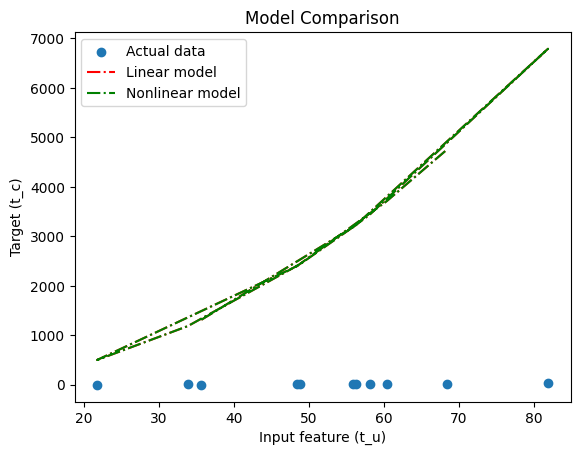

In [21]:
plt.scatter(t_u.numpy(), t_c.numpy(), label='Actual data')
plt.plot(t_u.numpy(), t_p.numpy(), label='Linear model', linestyle='-.', c = 'r')
plt.plot(t_u.numpy(), t_p.numpy(), label='Nonlinear model', linestyle='-.', c = 'g')
plt.legend()
plt.xlabel('Input feature (t_u)')
plt.ylabel('Target (t_c)')
plt.title('Model Comparison')
plt.show()